# EDA 1 - Exploração Simples

Nessa rápida exploração de dados, o objetivo é obter rápidas informações sobre a Coletânea de Hinos da Igreja Cristã Maranata (ICM) - Edição 2018.

Como descrito na própria coletânea:
> Os hinos e louvores, editados nesta Coletânea, englobam partes de outras edições já publicadas que expressam gratidão, adoração e louvor ao nosso Deus, entoados em todas épocas vividas pela Igreja Fiel, momento também comemorado pela Igreja Cristã Maranata em seus cinquenta anos de existência. 

## Origem dos dados

A extração de dados para construção da base tem por origem slides oficiais disponibilizados pelo Departamento de Louvor da ICM. Todo processo de extração está descrito no notebook `pptx_txt_json.ipynb`, neste mesmo repositório.

Até o momento desta análise, os dados estão salvos em uma base de dados SQLite.



In [1]:
from sqlalchemy import create_engine

# Create an engine to the SQLite database
engine = create_engine("sqlite:///db//hinos.db")

# Connect to the database
connection = engine.connect()
connection

In [2]:
import pandas as pd

sql_query = """
select
    numero,
    nome,
    texto,
    texto_limpo,
    categoria_id,
    c.descricao as categoria
from 
    hino
    left join categoria c on c.id = categoria_id
where
    coletanea_id = 1
"""

hinos_analise = pd.read_sql_query(sql_query, connection)
hinos_analise

,numero,nome,texto,texto_limpo,categoria_id,categoria
0,01,01 - O SANGUE DE JESUS TEM PODER,"O SANGUE DE JESUS TEM PODER,\nPODER QUE A MIM ...","O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...",1,CLAMOR
1,02,02 - O SANGUE DE JESUS TEM PODER PARA SALVAR,O SANGUE DE JESUS TEM PODER (2x)\nO SANGUE DE ...,O SANGUE DE JESUS TEM PODER O SANGUE DE JESUS...,1,CLAMOR
2,03,03 - CLAMO A TI,"CLAMO A TI, Ó MEU SENHOR,\nCLAMO A TI, MEU SAL...","CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...",1,CLAMOR
3,04,04 - QUANDO TE PROSTRARES,"QUANDO TE PROSTRARES DIANTE DE DEUS,\nLEMBRA Q...","QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...",1,CLAMOR
4,05,05 - CLAMANDO ESTOU,"CLAMANDO ESTOU, Ó MEU JESUS,\nPOR TEU SANGUE R...","CLAMANDO ESTOU, Ó MEU JESUS, POR TEU SANGUE RE...",1,CLAMOR
...,...,...,...,...,...,...
790,791,791 - EU QUERO MAIS E MAIS DE CRISTO,EU QUERO MAIS E MAIS DE CRISTO. \nEU QUERO MAI...,EU QUERO MAIS E MAIS DE CRISTO. EU QUERO MAIS ...,11,CORINHOS
791,792,792 - LOUVANDO A DEUS,LOUVANDO A DEUS \nE CAINDO NA GRAÇA DE TODO O ...,LOUVANDO A DEUS E CAINDO NA GRAÇA DE TODO O PO...,11,CORINHOS
792,793,793 - MESA PREPARADA,"MESA PREPARADA, CABEÇA UNGIDA,\nCÁLICE TRANSBO...","MESA PREPARADA, CABEÇA UNGIDA, CÁLICE TRANSBOR...",11,CORINHOS
793,794,794 - JESUS LIBERTOU,JESUS LIBERTOU MINH’ALMA DO MEU VIL PECADO.\nE...,JESUS LIBERTOU MINH’ALMA DO MEU VIL PECADO. EL...,11,CORINHOS


In [3]:
hinos_analise.loc[hinos_analise["numero"] == "null", "numero"] = 0
hinos_analise["numero_int"] = hinos_analise["numero"].astype(int)
hinos_analise["nome_limpo"] = hinos_analise["nome"].str.split(" - ").str[1].str.strip()
hinos_analise.loc[hinos_analise["numero_int"] == 0, "nome_limpo"] = hinos_analise[
    "nome"
]
hinos_analise = hinos_analise.drop(columns=["numero", "nome"])
hinos_analise.sort_values("numero_int")

,texto,texto_limpo,categoria_id,categoria,numero_int,nome_limpo
794,"AQUILO QUE FUI NÃO SOU MAIS,\nNEM SOU TUDO O Q...","AQUILO QUE FUI NÃO SOU MAIS, NEM SOU TUDO O QU...",1,CLAMOR,0,AQUILO QUE FUI NÃO SOU MAIS
0,"O SANGUE DE JESUS TEM PODER,\nPODER QUE A MIM ...","O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...",1,CLAMOR,1,O SANGUE DE JESUS TEM PODER
1,O SANGUE DE JESUS TEM PODER (2x)\nO SANGUE DE ...,O SANGUE DE JESUS TEM PODER O SANGUE DE JESUS...,1,CLAMOR,2,O SANGUE DE JESUS TEM PODER PARA SALVAR
2,"CLAMO A TI, Ó MEU SENHOR,\nCLAMO A TI, MEU SAL...","CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...",1,CLAMOR,3,CLAMO A TI
3,"QUANDO TE PROSTRARES DIANTE DE DEUS,\nLEMBRA Q...","QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...",1,CLAMOR,4,QUANDO TE PROSTRARES
...,...,...,...,...,...,...
789,AQUELE QUE HABITA\nNO ESCONDERIJO DO ALTÍSSIMO...,AQUELE QUE HABITA NO ESCONDERIJO DO ALTÍSSIMO ...,11,CORINHOS,790,AQUELE QUE HABITA NO ESCONDERIJO
790,EU QUERO MAIS E MAIS DE CRISTO. \nEU QUERO MAI...,EU QUERO MAIS E MAIS DE CRISTO. EU QUERO MAIS ...,11,CORINHOS,791,EU QUERO MAIS E MAIS DE CRISTO
791,LOUVANDO A DEUS \nE CAINDO NA GRAÇA DE TODO O ...,LOUVANDO A DEUS E CAINDO NA GRAÇA DE TODO O PO...,11,CORINHOS,792,LOUVANDO A DEUS
792,"MESA PREPARADA, CABEÇA UNGIDA,\nCÁLICE TRANSBO...","MESA PREPARADA, CABEÇA UNGIDA, CÁLICE TRANSBOR...",11,CORINHOS,793,MESA PREPARADA


795 louvores ao todo.

## Categorias

In [4]:
categorias_count = (
    hinos_analise[["categoria_id", "categoria", "numero_int"]]
    .groupby(["categoria_id", "categoria"])
    .count()
    .reset_index()
    .rename(columns={"numero_int": "contagem"})
)
categorias_count["categoria_abr"] = categorias_count["categoria"].str[:15]
categorias_count

,categoria_id,categoria,contagem,categoria_abr
0,1,CLAMOR,57,CLAMOR
1,2,INVOCAÇÃO E COMUNHÃO,40,INVOCAÇÃO E COM
2,3,DEDICAÇÃO,104,DEDICAÇÃO
3,4,"MORTE, RESSURREIÇÃO E SALVAÇÃO",94,"MORTE, RESSURRE"
4,5,CONSOLO E ENCORAJAMENTO,91,CONSOLO E ENCOR
5,6,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,92,SANTIFICAÇÃO E
6,7,VOLTA DE JESUS E ETERNIDADE,94,VOLTA DE JESUS
7,8,LOUVOR,78,LOUVOR
8,9,SALMOS DE LOUVOR,16,SALMOS DE LOUVO
9,10,GRUPO DE LOUVOR,65,GRUPO DE LOUVOR


<Axes: xlabel='contagem', ylabel='categoria_abr'>

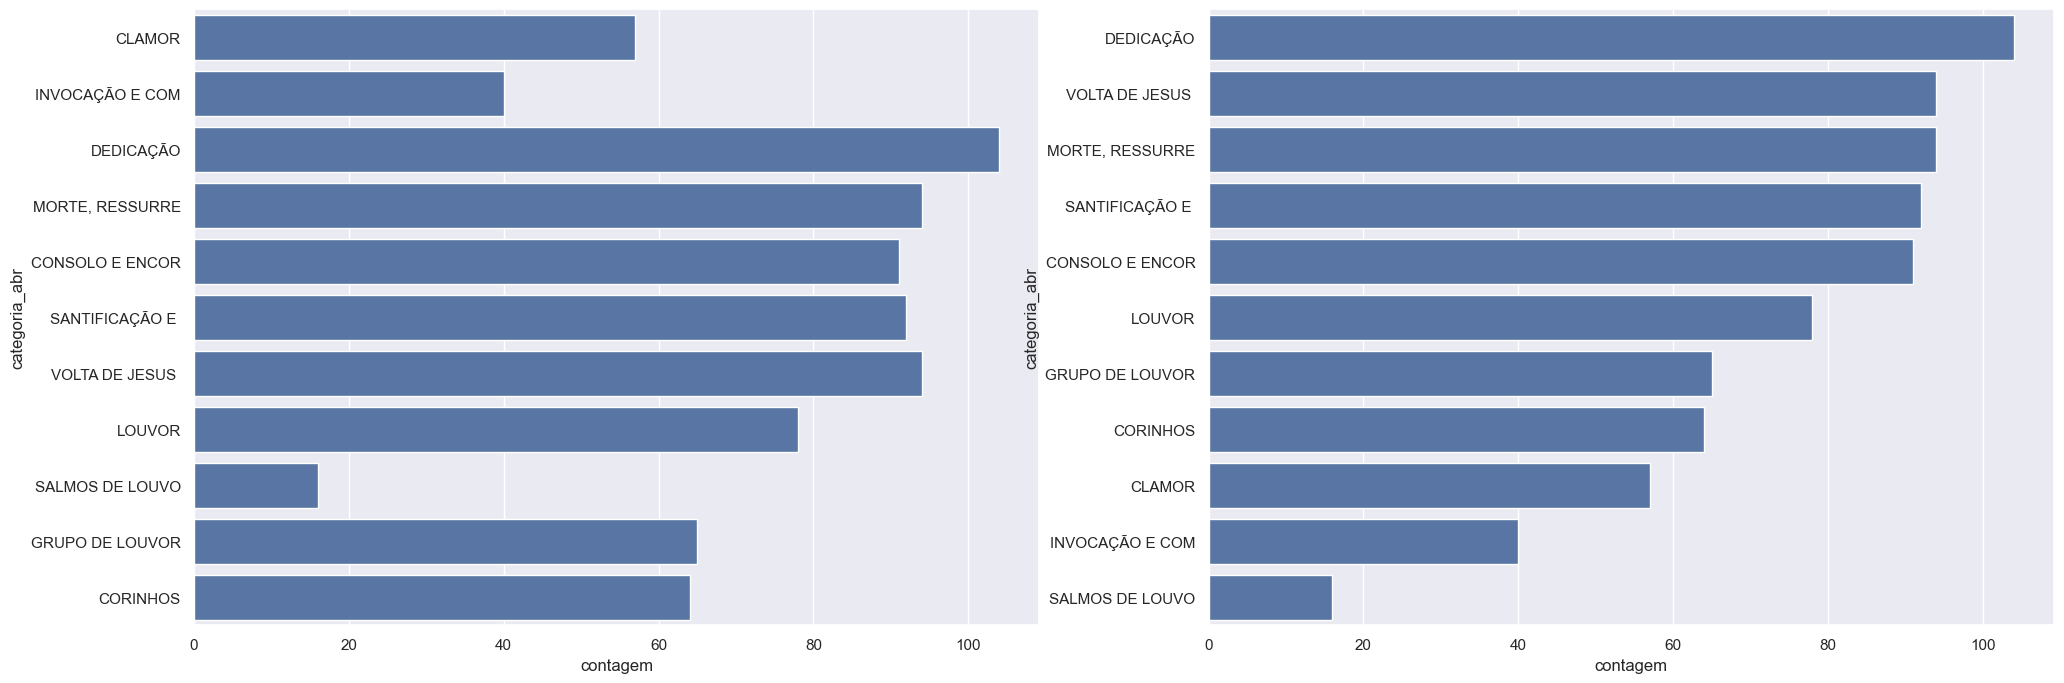

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")


f, axs = plt.subplots(1, 2, figsize=(24, 8))
sns.barplot(x="contagem", y="categoria_abr", data=categorias_count, ax=axs[0])
sns.barplot(
    x="contagem",
    y="categoria_abr",
    data=categorias_count.sort_values(by="contagem", ascending=False),
    ax=axs[1],
)

In [6]:
import string
import nltk
from tqdm import tqdm

nltk.download("stopwords")

stopwords = nltk.corpus.stopwords.words("portuguese")
texto_processado = []
titulo_processado = []
punctuations = string.punctuation.replace("-", "")

for hino in tqdm(hinos_analise.to_dict("records")):
    texto = hino["texto_limpo"].translate(str.maketrans("", "", punctuations))
    texto = " ".join([palavra.upper() for palavra in texto.split()])
    texto = " ".join(
        [palavra for palavra in texto.split() if palavra.lower() not in stopwords]
    )
    texto_processado.append(texto)

    titulo = hino["nome_limpo"].translate(str.maketrans("", "", punctuations))
    titulo = " ".join([palavra.upper() for palavra in titulo.split()])
    titulo = " ".join(
        [palavra for palavra in titulo.split() if palavra.lower() not in stopwords]
    )
    titulo_processado.append(titulo)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
100%|██████████| 795/795 [00:00<00:00, 2514.60it/s]


In [7]:
hinos_analise["texto_processado"] = texto_processado
hinos_analise["titulo_processado"] = titulo_processado
hinos_analise

,texto,texto_limpo,categoria_id,categoria,numero_int,nome_limpo,texto_processado,titulo_processado
0,"O SANGUE DE JESUS TEM PODER,\nPODER QUE A MIM ...","O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...",1,CLAMOR,1,O SANGUE DE JESUS TEM PODER,SANGUE JESUS PODER PODER MIM PODE VALER COMUNH...,SANGUE JESUS PODER
1,O SANGUE DE JESUS TEM PODER (2x)\nO SANGUE DE ...,O SANGUE DE JESUS TEM PODER O SANGUE DE JESUS...,1,CLAMOR,2,O SANGUE DE JESUS TEM PODER PARA SALVAR,SANGUE JESUS PODER SANGUE JESUS SANGUE JESUS S...,SANGUE JESUS PODER SALVAR
2,"CLAMO A TI, Ó MEU SENHOR,\nCLAMO A TI, MEU SAL...","CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...",1,CLAMOR,3,CLAMO A TI,CLAMO TI Ó SENHOR CLAMO TI SALVADOR SANGUE VID...,CLAMO TI
3,"QUANDO TE PROSTRARES DIANTE DE DEUS,\nLEMBRA Q...","QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...",1,CLAMOR,4,QUANDO TE PROSTRARES,PROSTRARES DIANTE DEUS LEMBRA JESUS CONTIGO PE...,PROSTRARES
4,"CLAMANDO ESTOU, Ó MEU JESUS,\nPOR TEU SANGUE R...","CLAMANDO ESTOU, Ó MEU JESUS, POR TEU SANGUE RE...",1,CLAMOR,5,CLAMANDO ESTOU,CLAMANDO Ó JESUS SANGUE REMIDOR SOCORRO SEI MA...,CLAMANDO
...,...,...,...,...,...,...,...,...
790,EU QUERO MAIS E MAIS DE CRISTO. \nEU QUERO MAI...,EU QUERO MAIS E MAIS DE CRISTO. EU QUERO MAIS ...,11,CORINHOS,791,EU QUERO MAIS E MAIS DE CRISTO,QUERO CRISTO QUERO PODER QUERO PRESENÇA QUERO ...,QUERO CRISTO
791,LOUVANDO A DEUS \nE CAINDO NA GRAÇA DE TODO O ...,LOUVANDO A DEUS E CAINDO NA GRAÇA DE TODO O PO...,11,CORINHOS,792,LOUVANDO A DEUS,LOUVANDO DEUS CAINDO GRAÇA TODO POVO TODOS DIA...,LOUVANDO DEUS
792,"MESA PREPARADA, CABEÇA UNGIDA,\nCÁLICE TRANSBO...","MESA PREPARADA, CABEÇA UNGIDA, CÁLICE TRANSBOR...",11,CORINHOS,793,MESA PREPARADA,MESA PREPARADA CABEÇA UNGIDA CÁLICE TRANSBORDA...,MESA PREPARADA
793,JESUS LIBERTOU MINH’ALMA DO MEU VIL PECADO.\nE...,JESUS LIBERTOU MINH’ALMA DO MEU VIL PECADO. EL...,11,CORINHOS,794,JESUS LIBERTOU,JESUS LIBERTOU MINH’ALMA VIL PECADO FALANDO TI...,JESUS LIBERTOU


In [10]:
hinos_analise["titulo_tam_char"] = hinos_analise["nome_limpo"].str.len()
hinos_analise["titulo_tam_palavras"] = hinos_analise["nome_limpo"].str.split().str.len()
hinos_analise["texto_tam_palavras"] = (
    hinos_analise["texto"].str.split().str.len()
)
hinos_analise["texto_processado_tam_palavras"] = (
    hinos_analise["texto_processado"].str.split().str.len()
)

hinos_analise

,texto,texto_limpo,categoria_id,categoria,numero_int,nome_limpo,texto_processado,titulo_processado,titulo_tam_char,titulo_tam_palavras,texto_tam_palavras,texto_processado_tam_palavras
0,"O SANGUE DE JESUS TEM PODER,\nPODER QUE A MIM ...","O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...",1,CLAMOR,1,O SANGUE DE JESUS TEM PODER,SANGUE JESUS PODER PODER MIM PODE VALER COMUNH...,SANGUE JESUS PODER,27,6,94,48
1,O SANGUE DE JESUS TEM PODER (2x)\nO SANGUE DE ...,O SANGUE DE JESUS TEM PODER O SANGUE DE JESUS...,1,CLAMOR,2,O SANGUE DE JESUS TEM PODER PARA SALVAR,SANGUE JESUS PODER SANGUE JESUS SANGUE JESUS S...,SANGUE JESUS PODER SALVAR,39,8,45,25
2,"CLAMO A TI, Ó MEU SENHOR,\nCLAMO A TI, MEU SAL...","CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...",1,CLAMOR,3,CLAMO A TI,CLAMO TI Ó SENHOR CLAMO TI SALVADOR SANGUE VID...,CLAMO TI,10,3,41,25
3,"QUANDO TE PROSTRARES DIANTE DE DEUS,\nLEMBRA Q...","QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...",1,CLAMOR,4,QUANDO TE PROSTRARES,PROSTRARES DIANTE DEUS LEMBRA JESUS CONTIGO PE...,PROSTRARES,20,3,46,29
4,"CLAMANDO ESTOU, Ó MEU JESUS,\nPOR TEU SANGUE R...","CLAMANDO ESTOU, Ó MEU JESUS, POR TEU SANGUE RE...",1,CLAMOR,5,CLAMANDO ESTOU,CLAMANDO Ó JESUS SANGUE REMIDOR SOCORRO SEI MA...,CLAMANDO,14,2,25,19
...,...,...,...,...,...,...,...,...,...,...,...,...
790,EU QUERO MAIS E MAIS DE CRISTO. \nEU QUERO MAI...,EU QUERO MAIS E MAIS DE CRISTO. EU QUERO MAIS ...,11,CORINHOS,791,EU QUERO MAIS E MAIS DE CRISTO,QUERO CRISTO QUERO PODER QUERO PRESENÇA QUERO ...,QUERO CRISTO,30,7,42,16
791,LOUVANDO A DEUS \nE CAINDO NA GRAÇA DE TODO O ...,LOUVANDO A DEUS E CAINDO NA GRAÇA DE TODO O PO...,11,CORINHOS,792,LOUVANDO A DEUS,LOUVANDO DEUS CAINDO GRAÇA TODO POVO TODOS DIA...,LOUVANDO DEUS,15,3,26,15
792,"MESA PREPARADA, CABEÇA UNGIDA,\nCÁLICE TRANSBO...","MESA PREPARADA, CABEÇA UNGIDA, CÁLICE TRANSBOR...",11,CORINHOS,793,MESA PREPARADA,MESA PREPARADA CABEÇA UNGIDA CÁLICE TRANSBORDA...,MESA PREPARADA,14,2,75,40
793,JESUS LIBERTOU MINH’ALMA DO MEU VIL PECADO.\nE...,JESUS LIBERTOU MINH’ALMA DO MEU VIL PECADO. EL...,11,CORINHOS,794,JESUS LIBERTOU,JESUS LIBERTOU MINH’ALMA VIL PECADO FALANDO TI...,JESUS LIBERTOU,14,2,45,26


## Rankings de título e texto

In [21]:
display(
    hinos_analise.sort_values("titulo_tam_char", ascending=False).head(10)[
        ["numero_int", "nome_limpo", "categoria", "titulo_tam_char"]
    ]
)
display(
    hinos_analise.sort_values("titulo_tam_palavras", ascending=False).head(10)[
        ["numero_int", "nome_limpo", "categoria", "titulo_tam_palavras"]
    ]
)

,numero_int,nome_limpo,categoria,titulo_tam_char
705,706,DESTE MUNDO ESCRAVO FUI (GRANDES COISAS FEZ O ...,GRUPO DE LOUVOR,61
453,454,"SENHOR, MEU DEUS, O QUE DIREI DE TI? (SAÚDE E...",SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,56
184,185,"JESUS, SENHOR, ME CHEGO A TI (EU VENHO COMO E...",DEDICAÇÃO,51
196,197,HOJE QUERO SOMENTE AGRADECER (SOMENTE AGRADE...,DEDICAÇÃO,50
355,356,O SENHOR É O MEU PASTOR (REFRIGERA A MINHA ALMA),CONSOLO E ENCORAJAMENTO,49
356,357,O SENHOR É O MEU PASTOR (BONDADE E MISERICÓRDIA),CONSOLO E ENCORAJAMENTO,49
460,461,"TU, Ó SENHOR, TU ÉS TÃO PURO (AVIVA A TUA OBRA)",SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,48
364,365,"NÃO TEMAS, POIS TE ESCOLHI (QUANDO PELAS ÁGUAS)",CONSOLO E ENCORAJAMENTO,48
719,720,"AS GRUTAS, AS ROCHAS IMENSAS (UM HINO AO SENHOR)",GRUPO DE LOUVOR,48
692,693,"DORMINDO NO MEU LEITO (JERUSALÉM, CIDADE SANTA)",GRUPO DE LOUVOR,47


,numero_int,nome_limpo,categoria,titulo_tam_palavras
460,461,"TU, Ó SENHOR, TU ÉS TÃO PURO (AVIVA A TUA OBRA)",SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,11
705,706,DESTE MUNDO ESCRAVO FUI (GRANDES COISAS FEZ O ...,GRUPO DE LOUVOR,11
492,493,"COMO FOI PARA O CÉU, JESUS CRISTO HÁ DE VIR",VOLTA DE JESUS E ETERNIDADE,10
672,673,"Ó PAI, EU QUERIA TANTO VER (AUTOR DA MINHA FÉ)",GRUPO DE LOUVOR,10
159,160,EU SOU DO MEU AMADO E ELE ME TEM AFEIÇÃO,DEDICAÇÃO,10
184,185,"JESUS, SENHOR, ME CHEGO A TI (EU VENHO COMO E...",DEDICAÇÃO,10
453,454,"SENHOR, MEU DEUS, O QUE DIREI DE TI? (SAÚDE E...",SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,10
284,285,TU QUE ANDAS SÓ E TRISTE SEM SABER O CAMINHO,"MORTE, RESSURREIÇÃO E SALVAÇÃO",10
653,654,GRANDE É O SENHOR E MUI DIGNO DE SER LOUVADO,SALMOS DE LOUVOR,10
720,721,PROCLAMAI A TODO O MUNDO QUE O SENHOR É REI,GRUPO DE LOUVOR,10


In [22]:
display(
    hinos_analise.sort_values(by="texto_tam_palavras", ascending=False).head(10)[
        ["numero_int", "nome_limpo", "categoria", "texto_tam_palavras"]
    ]
)
display(
    hinos_analise.sort_values(by="texto_processado_tam_palavras", ascending=False).head(10)[
        ["numero_int", "nome_limpo", "categoria", "texto_processado_tam_palavras"]
    ]
)

,numero_int,nome_limpo,categoria,texto_tam_palavras
458,459,"É TEMPO, É TEMPO",SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,289
492,493,"COMO FOI PARA O CÉU, JESUS CRISTO HÁ DE VIR",VOLTA DE JESUS E ETERNIDADE,246
309,310,MESTRE O MAR SE REVOLTA,CONSOLO E ENCORAJAMENTO,224
408,409,EIS MARCHAMOS PARA AQUELE BOM PAÍS,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,216
476,477,SEMPRE VOU LEMBRAR,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,215
430,431,CRISTO JÁ NOS PREPAROU,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,214
730,731,SEQUÊNCIA DE LOUVORES Nº 1,CORINHOS,214
147,148,"UMA CERTA VEZ, JESUS CRISTO",DEDICAÇÃO,213
363,364,DÁ-ME MAIS FÉ,CONSOLO E ENCORAJAMENTO,201
277,278,A NOVA DO EVANGELHO,"MORTE, RESSURREIÇÃO E SALVAÇÃO",200


,numero_int,nome_limpo,categoria,texto_processado_tam_palavras
465,466,EIS O ESTANDARTE,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,144
730,731,SEQUÊNCIA DE LOUVORES Nº 1,CORINHOS,136
363,364,DÁ-ME MAIS FÉ,CONSOLO E ENCORAJAMENTO,131
706,707,"EU CONFIO EM TI, SENHOR",GRUPO DE LOUVOR,122
476,477,SEMPRE VOU LEMBRAR,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,117
260,261,CRISTO CAMINHAVA LENTAMENTE,"MORTE, RESSURREIÇÃO E SALVAÇÃO",113
458,459,"É TEMPO, É TEMPO",SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,111
408,409,EIS MARCHAMOS PARA AQUELE BOM PAÍS,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,111
692,693,"DORMINDO NO MEU LEITO (JERUSALÉM, CIDADE SANTA)",GRUPO DE LOUVOR,107
538,539,"JUNTO AO TRONO DE DEUS, PREPARADO",VOLTA DE JESUS E ETERNIDADE,105


In [23]:
display(
    hinos_analise.sort_values(by="texto_tam_palavras", ascending=True).head(10)[
        ["numero_int", "nome_limpo", "categoria", "texto_tam_palavras"]
    ]
)
display(
    hinos_analise.sort_values(by="texto_processado_tam_palavras", ascending=True).head(
        10
    )[["numero_int", "nome_limpo", "categoria", "texto_processado_tam_palavras"]]
)

,numero_int,nome_limpo,categoria,texto_tam_palavras
14,15,"CLAMAREI, CLAMAREI",CLAMOR,12
12,13,PÕE TEU SANGUE SOBRE MIM,CLAMOR,15
10,11,"REVESTE, SENHOR, TEU POVO",CLAMOR,16
191,192,"JESUS, JESUS, EU TE AMO",DEDICAÇÃO,16
18,19,TEU POVO CLAMA,CLAMOR,17
737,738,"GLÓRIA, GLÓRIA",CORINHOS,18
87,88,DAS PROFUNDEZAS,INVOCAÇÃO E COMUNHÃO,19
11,12,HÁ VITÓRIA PARA MIM,CLAMOR,19
91,92,PAI CELESTE,INVOCAÇÃO E COMUNHÃO,19
742,743,VENCEDOR SEREI,CORINHOS,19


,numero_int,nome_limpo,categoria,texto_processado_tam_palavras
14,15,"CLAMAREI, CLAMAREI",CLAMOR,9
742,743,VENCEDOR SEREI,CORINHOS,10
191,192,"JESUS, JESUS, EU TE AMO",DEDICAÇÃO,10
737,738,"GLÓRIA, GLÓRIA",CORINHOS,10
586,587,"Ó JESUS, EXALTAR-TE-EI",LOUVOR,11
400,401,COMO TU QUERES,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,11
18,19,TEU POVO CLAMA,CLAMOR,11
10,11,"REVESTE, SENHOR, TEU POVO",CLAMOR,12
734,735,SEU NOME É JESUS,CORINHOS,12
303,304,"BASTA QUE ME TOQUES, SENHOR",CONSOLO E ENCORAJAMENTO,12


## Palavras

In [47]:
palavras = hinos_analise["texto_processado"].str.split().explode().tolist()
palavras = [palavra for palavra in palavras if "CORO" not in palavra]

In [46]:
print(len(palavras))
set_words_full = list(set(palavras))
count_words = [palavras.count(i) for i in set_words_full]

contagem_palav = pd.DataFrame(
    zip(set_words_full, count_words), columns=["palavra", "contagem"]
)
contagem_palav = contagem_palav.sort_values("contagem", ascending=False).reset_index()
contagem_palav

39947


,index,palavra,contagem
0,1699,JESUS,1362
1,270,SENHOR,1212
2,3665,DEUS,869
3,1071,AMOR,614
4,211,GLÓRIA,492
...,...,...,...
4853,31,PARTIU,1
4854,30,COMPUS,1
4855,29,AVANÇAI,1
4856,4840,PERMANENTE,1


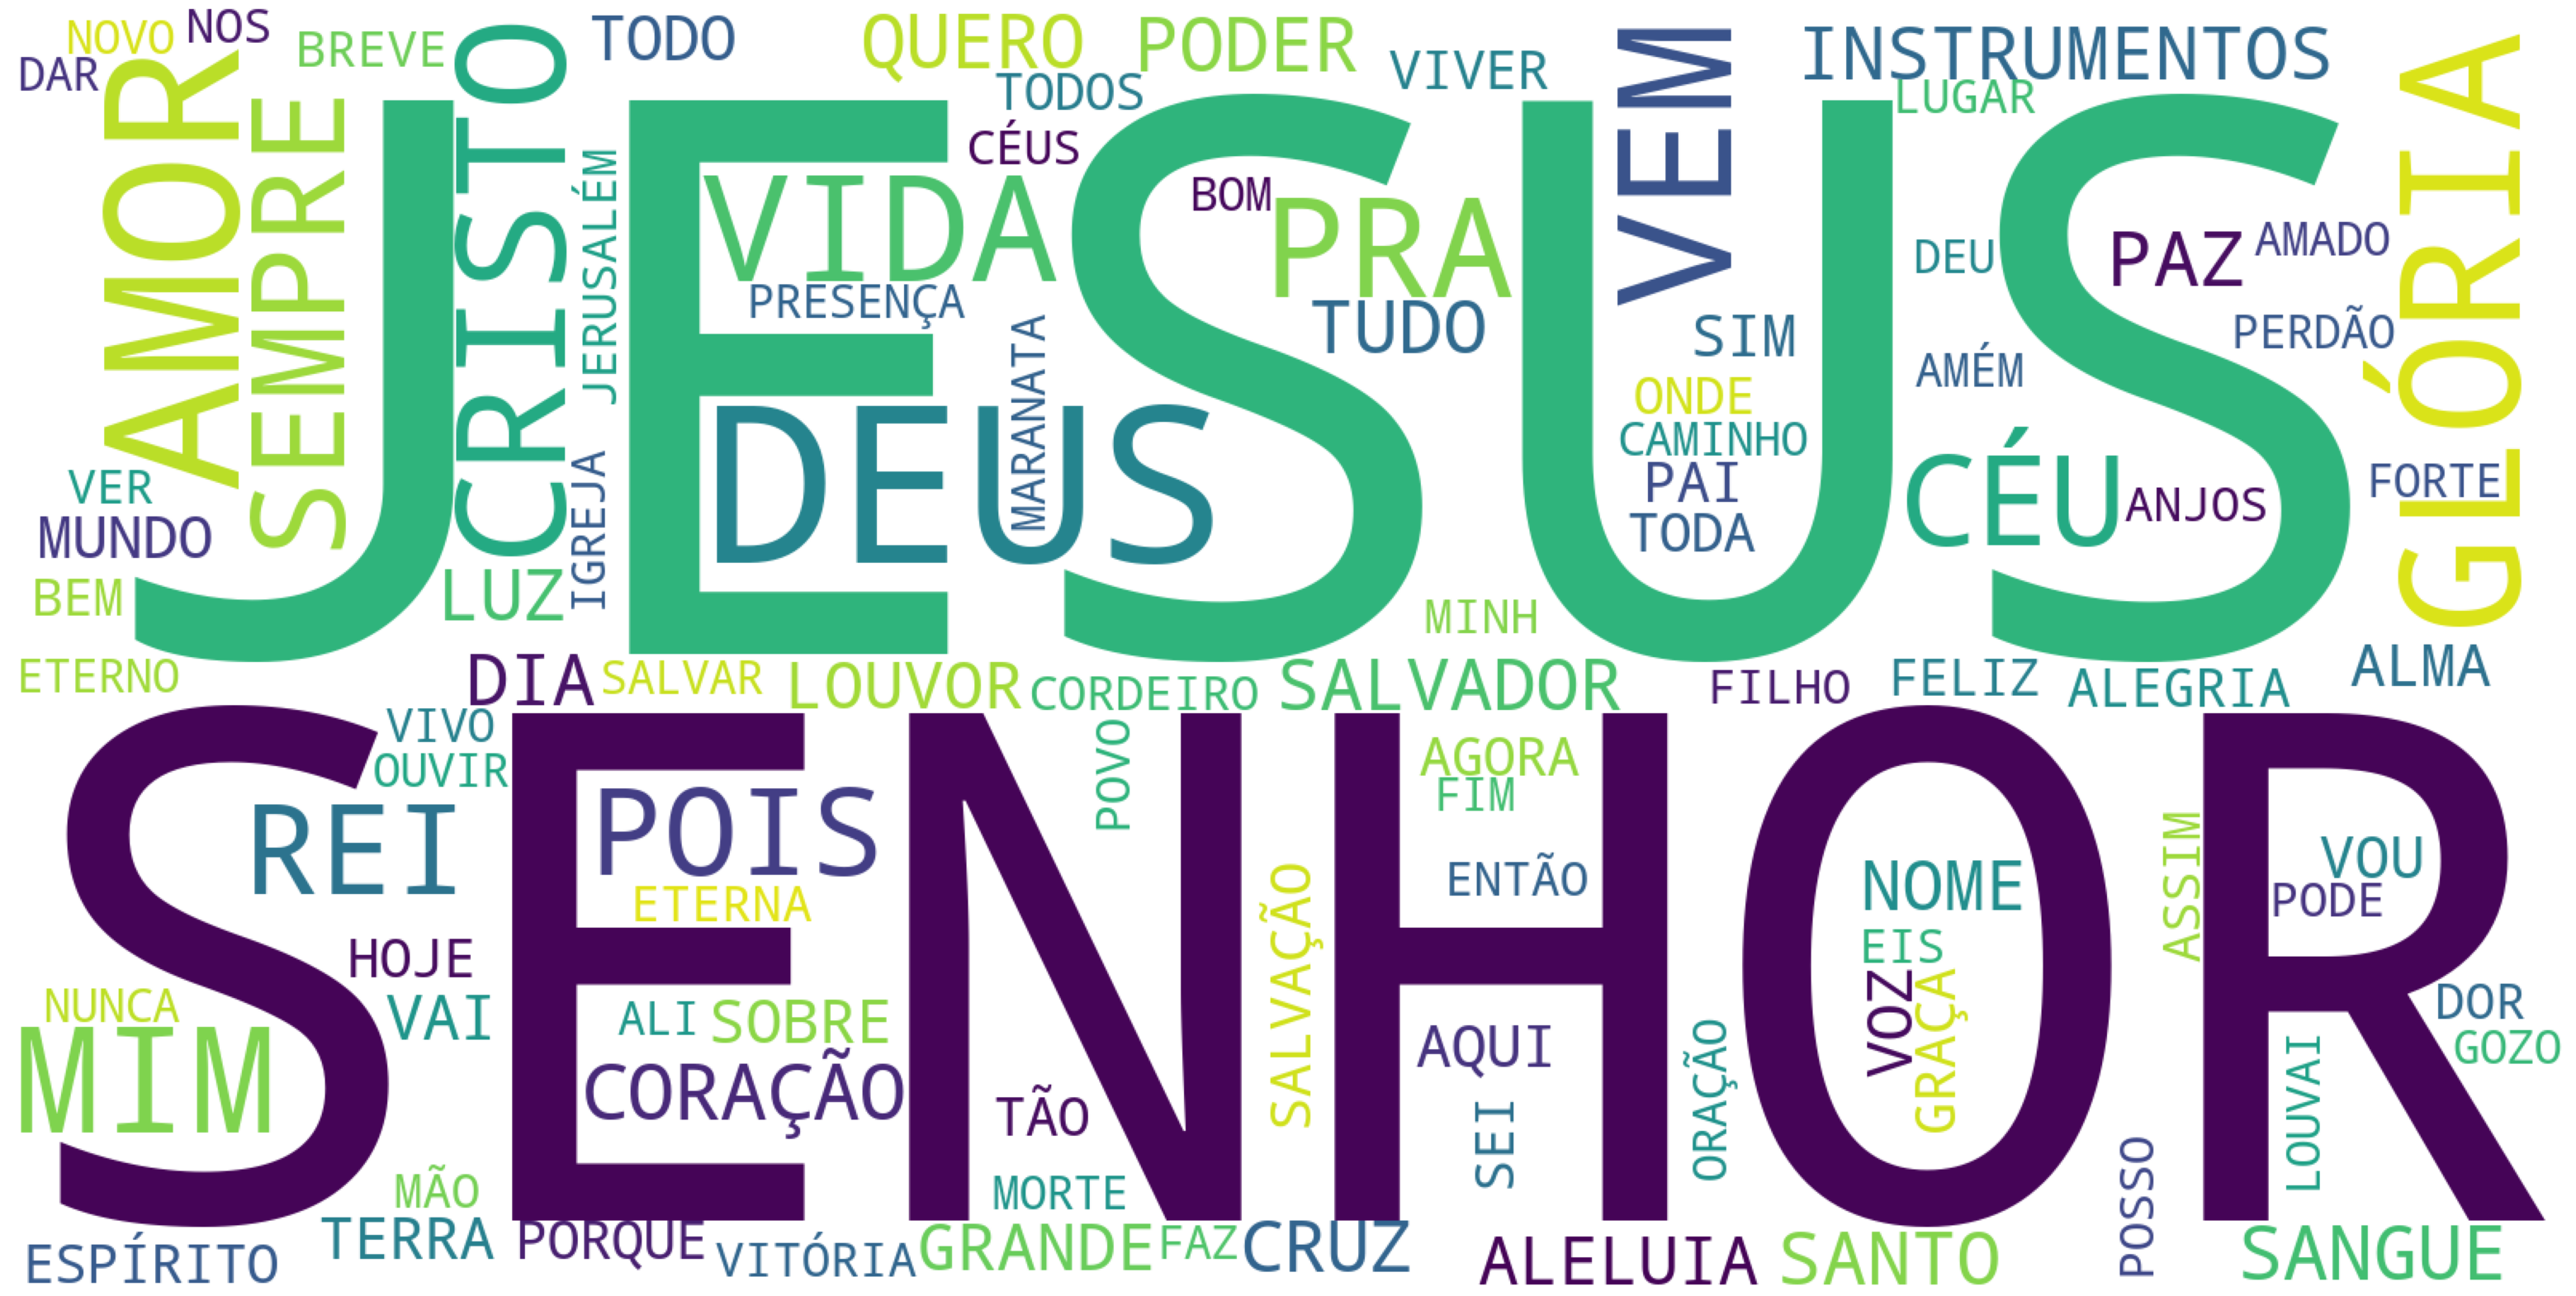

In [45]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color="white",
    min_word_length=3,
    max_words=100,
    collocations=False,
    normalize_plurals=False,
    # colormap="summer",
).generate(" ".join(palavras))
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()